<h1><font color="DarkBlue "> Moore FSM Generation</font> </h1>
<h2><font color="DarkBlue ">Generate stimulus and trace response of a synchronous 4-bit counter</font></h2>
<h3><font color="DarkBlue ">IC used - NTE74HC161 TTL</font></h3>

This notebook shows and example of generating patterns and tracing the outputs for an off-the-shelf IC using FSM Generator of the PYNQ DI overlay.  
The input stimulus is provided and output respose is captured in the notebook using the WaveJson format.  
The Pattern is generated at 10Mhz.

#### References
http://datasheet.octopart.com/NTE74HC163-NTE-Electronics-datasheet-22129263.pdf

<h2><font color="DarkBlue "> Step 1: Overlay and FSM specification</font></h2>

In [1]:
from pynq import Overlay
Overlay('interface.bit').download()

In [2]:
fsm_spec = {'inputs': [('Run_Counter','D14'), ('Load_Counter', 'D9'), 
                       ('m1', 'D15'), ('m2', 'D16'), ('m3', 'D17')], #, ('m4', 'D18'), ('m5', 'D19')],
            'outputs': [('Clear','D0'), ('Clk','D1'), ('Load_Bit<0>','D2'),
                        ('Load_Bit<1>','D3'),('Load_Bit<2>','D4'),
                        ('Load_Bit<3>','D5'), ('Enable_P','D6'), 
                        ('Enable_T','D7'), ('Load','D8')],
            'states': ['Clear', 'Count_clkn', 'Count_clkp', 'Load_clkn',
                       'Load_clkp'],
            'transitions': [['00---', 'Clear', 'Clear', '000000000'],
                            ['01---', 'Clear', 'Clear', '000000000'],
                            ['10---', 'Clear', 'Count_clkn', '000000000'],
                            ['11---', 'Clear', 'Load_clkn', '000000000'],        
                            ['00---', 'Count_clkn', 'Clear', '100000111'],
                            ['01---', 'Count_clkn', 'Clear', '100000111'],
                            ['10---', 'Count_clkn', 'Count_clkp', '100000111'],
                            ['11---', 'Count_clkn', 'Load_clkn', '100000111'],       
                            ['00---', 'Count_clkp', 'Clear', '110000111'],
                            ['01---', 'Count_clkp', 'Clear', '110000111'],
                            ['10---', 'Count_clkp', 'Count_clkn', '110000111'],
                            ['11---', 'Count_clkp', 'Load_clkn', '110000111'],        
                            ['00---', 'Load_clkn', 'Clear', '101100110'],
                            ['01---', 'Load_clkn', 'Clear', '101100110'],
                            ['10---', 'Load_clkn', 'Load_clkp', '101100110'],
                            ['11---', 'Load_clkn', 'Load_clkp', '101100110'],                            
                            ['00---', 'Load_clkp', 'Clear', '111100110'], 
                            ['01---', 'Load_clkp', 'Clear', '111100110'],
                            ['10---', 'Load_clkp', 'Count_clkn', '111100110'],
                            ['11---', 'Load_clkp', 'Load_clkp', '111100110']]}
            

<h2><font color="DarkBlue "> Step 2: Import FSM generator and display state diagram</font></h2>

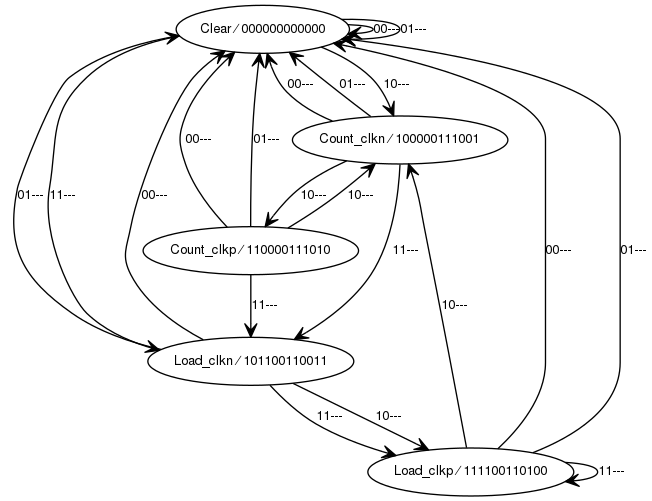

In [3]:
from pynq.lib import FSMBuilder
from pynq.lib import request_intf

microblaze_intf = request_intf()

fsm = FSMBuilder(microblaze_intf, fsm_spec, num_analyzer_samples=128, use_state_bits=True)

fsm.show_state_diagram()

In [5]:
fsm.arm()

microblaze_intf.run()

In [6]:
fsm.show_waveform()

In [7]:
microblaze_intf.stop()
microblaze_intf.reset_buffers()